In [1]:
import pandas as pd
import os
from os.path  import join

In [2]:
%run analysis_utils.py

In [143]:
# def map_groups(exp):
#     exp = exp.lower()
#     if 'gf' in exp:
#         return 'Geneformer'
#     elif 'geneformer' in exp:
#         return 'Geneformer'
#     elif 'scgpt' in exp:
#         return 'scGPT'
#     elif any(x in exp for x in ['hvg', 'pca', 'scvi']):
#         return 'Baseline'
#     else:
#         return 'other'  # optional fallback
# model_name_map={
# 'hvg': 'HVG',
# 'pca': 'PCA',
# 'scgpt': 'scGPT', 
# 'scgpt_cancer': 'scGPT [cancer]',
# 'scvi':'scVI',
# 'gf-6L-30M-i2048': 'GF-V1',
# 'gf-6L-30M-i2048_continue': 'GF-V1 [continue]',
# 'Geneformer-V2-104M_CLcancer': 'GF-V2 [cancer]',
# 'Geneformer-V2-104M': 'GF-V2',
# 'Geneformer-V2-104M_continue': 'GF-V2 [continue]',
# 'Geneformer-V2-316M': 'GF-V2-Deep',
# 'gf-6L-30M-i2048_finetune': 'GF-V1 [finetune]',
# 'Geneformer-V2-104M_finetune': 'GF-V2 [finetune]',

# }

In [3]:
def get_metrics(experiments):
    mil_results = []
    vote_results = []
    avg_results = []
    for exp in experiments:
            mil_path = os.path.join(exp, 'mil.csv')
            vote_path = os.path.join(exp, 'vote.csv')
            avg_path = os.path.join(exp,  'avg.csv')

            if os.path.exists(vote_path) :
                vote_df = pd.read_csv(vote_path)
                vote_df['experiment'] = os.path.basename(exp)
                vote_results.append(vote_df)

            if os.path.exists(mil_path) :
                mil_df = pd.read_csv(mil_path)
                mil_df['experiment'] = os.path.basename(exp)
                mil_results.append(mil_df)

            if os.path.exists(avg_path) :
                avg_df = pd.read_csv(avg_path)
                avg_df['experiment'] = os.path.basename(exp)
                avg_results.append(avg_df)

            avg_df = pd.concat(avg_results, ignore_index=True) 
            mil_df = pd.concat(mil_results, ignore_index=True) 
            vote_df = pd.concat(vote_results, ignore_index=True) 
    return avg_df, mil_df, vote_df


In [4]:
base_dir = './metrics/luad1'

avg_df = pd.read_csv(join(base_dir, 'avg.csv'))

In [5]:
avg_df = avg_df[avg_df.Metrics=='AUPRC']
avg_df
mean_std_df = avg_df.groupby('experiment')['model'].agg(['mean', 'std'])
mean_std_df['SNR']  = mean_std_df['mean']/mean_std_df['std']
mean_std_df['SNR'].mean()

1.5721951338770197

In [6]:
base_dir = './metrics/luad2'
# experiments = [ join(base_dir, f.name) for f in os.scandir(base_dir) if f.is_dir() ]
# experiments
# avg_df, mil_df, vote_df = get_metrics(experiments)
avg_df = pd.read_csv(join(base_dir, 'avg.csv'))
avg_df = avg_df[avg_df.Metrics=='AUPRC']
mean_std_df = avg_df.groupby('experiment')['model'].agg(['mean', 'std'])
mean_std_df['SNR']  = mean_std_df['mean']/mean_std_df['std']
mean_std_df['SNR'].mean()

inf

In [20]:
mean_std_df

,mean,std,SNR
experiment,,,
Geneformer-V2-104M,1.00,0.000000,inf
Geneformer-V2-104M_CLcancer,1.00,0.000000,inf
Geneformer-V2-316M,1.00,0.000000,inf
cellplm,1.00,0.000000,inf
gf-6L-30M-i2048,1.00,0.000000,inf
hvg,1.00,0.000000,inf
pca,0.75,0.288675,2.598076
scfoundation,1.00,0.000000,inf
scgpt,1.00,0.000000,inf


In [7]:
tasks = ['brca_full_chemo', 'luad1', 'luad2', 'brca_full_outcome', 'brca_full_pre_post', 'brca_full_subtype']

In [8]:
for task in tasks:
    base_dir = join('./metrics/', task)
    avg_df = pd.read_csv(join(base_dir, 'avg.csv'))
    avg_df = avg_df[avg_df.Metrics=='AUPRC']
    # mean_std_df = avg_df.groupby('experiment')['model'].agg(['mean', 'std'])
    mean_std_df = avg_df.groupby('experiment')['model'].agg(['mean', 'std'])
    mean_std_df['SNR']  = mean_std_df['mean']/mean_std_df['std']
    SNR = mean_std_df['SNR'].mean()
    print(task, SNR)

brca_full_chemo 2.7238813238054966
luad1 1.5721951338770197
luad2 inf
brca_full_outcome 3.3552712471903092
brca_full_pre_post inf
brca_full_subtype 11.071022484097227


In [9]:
metric_map = {'auprc':'AUPRC'}

In [44]:
vote_df

,Unnamed: 0,experiment,group,mean,std
0,0,GF-V2,Geneformer,0.333333,0.117851
1,1,GF-V2 [cancer],Geneformer,0.520833,0.335927
4,4,GF-V2-Deep,Geneformer,0.479167,0.349437
6,6,CellPLM,Other,0.520833,0.335927
8,8,GF-V1,Geneformer,0.341667,0.122852
10,10,HVG,Baseline,0.645833,0.410369
11,11,PCA,Baseline,0.645833,0.410369
12,12,scFoundation,Other,0.520833,0.335927
14,14,scGPT,scGPT,0.520833,0.335927
15,15,scGPT [cancer],scGPT,0.425000,0.384057


In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def plot_cv_metrics(mil_df_all, vote_df_all, avg_df_all, labels, x_label, show_error_bars=False, plot_type='errorbar'):
    """
    Plots the average value of a specified metric across folds for each experiment,
    with optional error bars or bar plot, sorted within groups and spaced between groups.
    Adds background highlighting for each group.
    """

    import matplotlib.pyplot as plt
    import numpy as np

#     # Filter and extract metrics
#     mil_metric = mil_df_all[['mean', 'experiment', 'group']]
#     vote_metric = vote_df_all[['mean', 'experiment', 'group']]
#     avg_metric = avg_df_all[['mean', 'experiment', 'group']]

#     # Compute group statistics
#     mil_stats = mil_metric.groupby(['experiment', 'group'])[metric].agg(['mean', 'std']).reset_index()
#     vote_stats = vote_metric.groupby(['experiment', 'group'])[metric].agg(['mean', 'std']).reset_index()
#     avg_stats = avg_metric.groupby(['experiment', 'group'])[metric].agg(['mean', 'std']).reset_index()

    mil_stats= mil_df_all[['experiment', 'group', 'mean', 'std']]
    vote_stats= vote_df_all[['experiment', 'group', 'mean', 'std']]
    avg_stats= avg_df_all[['experiment', 'group', 'mean', 'std']]

    
    # Sort within group
    mil_stats['sort_key'] = mil_stats.groupby('group')['mean'].transform(lambda x: x.rank(method='first'))
    mil_stats = mil_stats.sort_values(by=['group', 'sort_key'])

    vote_stats = vote_stats.set_index('experiment').loc[mil_stats['experiment'].values].reset_index()
    avg_stats = avg_stats.set_index('experiment').loc[mil_stats['experiment'].values].reset_index()

    # Compute x positions
    unique_groups = mil_stats['group'].unique()
    group_to_exps = {g: mil_stats[mil_stats['group'] == g] for g in unique_groups}
    x_labels, group_labels, x_positions = [], [], []
    xpos = 0
    spacing = 1.0
    group_bounds = []

    palette = sns.color_palette("Set2", n_colors=len(labels))
    column_colors = {col: palette[i] for i, col in enumerate(labels)}
    
    for g in unique_groups:
        exps = group_to_exps[g]
        start_x = xpos
        for _, row in exps.iterrows():
            x_labels.append(row['experiment'])
            group_labels.append(g)
            x_positions.append(xpos)
            xpos += 1
        end_x = xpos - 1
        group_bounds.append((start_x - 0.5, end_x + 0.5))
        xpos += spacing

    x = np.array(x_positions)
    mil_means, mil_stds = mil_stats['mean'].values, mil_stats['std'].values
    vote_means, vote_stds = vote_stats['mean'].values, vote_stats['std'].values
    avg_means, avg_stds = avg_stats['mean'].values, avg_stats['std'].values

    # Plotting
    fig = plt.figure(figsize=(14, 6))
    ax = plt.gca()

    # Background bands per group
    for i, (xmin, xmax) in enumerate(group_bounds):
        ax.axvspan(xmin, xmax, color='whitesmoke')

    # Offsets
    if plot_type == 'errorbar':
        offset = 0.2
        # plt.errorbar(x - offset, mil_means, yerr=mil_stds if show_error_bars else None,
        #              fmt='o', label=labels[0], mfc =column_colors[labels[0]],  capsize=5 if show_error_bars else 0)
        # plt.errorbar(x, vote_means, yerr=vote_stds if show_error_bars else None,
        #              fmt='s', label=labels[1], mfc =column_colors[labels[1]], capsize=5 if show_error_bars else 0)
        # plt.errorbar(x + offset, avg_means, yerr=avg_stds if show_error_bars else None,
        #              fmt='^', label=labels[2], mfc =column_colors[labels[2]], capsize=5 if show_error_bars else 0)
        plt.errorbar(x - offset, mil_means, yerr=mil_stds if show_error_bars else None,
             fmt='o', label=labels[0],
             color=column_colors[labels[0]],
             # ecolor=column_colors[labels[0]],
             capsize=5 if show_error_bars else 0)

        plt.errorbar(x, vote_means, yerr=vote_stds if show_error_bars else None,
                     fmt='s', label=labels[1],
                     color=column_colors[labels[1]],
                     # ecolor=column_colors[labels[1]],
                     capsize=5 if show_error_bars else 0)

        plt.errorbar(x + offset, avg_means, yerr=avg_stds if show_error_bars else None,
             fmt='^', label=labels[2],
             color=column_colors[labels[2]],
             # ecolor=column_colors[labels[2]],
             capsize=5 if show_error_bars else 0)

    elif plot_type == 'bar':
        width = 0.2
        plt.bar(x - width, mil_means, yerr=mil_stds if show_error_bars else None,
                width=width, label=labels[0], capsize=5 if show_error_bars else 0)
        plt.bar(x, vote_means, yerr=vote_stds if show_error_bars else None,
                width=width, label=labels[1], capsize=5 if show_error_bars else 0)
        plt.bar(x + width, avg_means, yerr=avg_stds if show_error_bars else None,
                width=width, label=labels[2], capsize=5 if show_error_bars else 0)

    # Group labels
    for g in unique_groups:
        idxs = [j for j, grp in enumerate(group_labels) if grp == g]
        if idxs:
            mid = np.mean([x[j] for j in idxs])
            plt.text(mid, 1.1, g, ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Aesthetics
    plt.xticks(x, x_labels, rotation=45, ha='right', fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel('AUPRC', fontsize=14)
    plt.ylim(0, 1.1)
    plt.legend(bbox_to_anchor=(-.1, -.1), loc='lower left', borderaxespad=0., fontsize=12)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()

    return fig

In [11]:
# dd = dd.reset_index(names= 'experiment')

In [12]:
base_dir = './metrics/luad1'
avg_df = pd.read_csv(join(base_dir, 'AUPRC_avg.csv'))
avg_df

,Unnamed: 0,experiment,group,mean,std
0,0,Geneformer-V2-104M,Geneformer,0.500000,0.333333
1,1,Geneformer-V2-104M_CLcancer,Geneformer,0.500000,0.333333
2,2,Geneformer-V2-104M_CLcancer_no_batch,Geneformer,0.508333,0.350000
3,3,Geneformer-V2-104M_no_batch,Geneformer,0.520833,0.335927
4,4,Geneformer-V2-316M,Geneformer,0.341667,0.122852
5,5,Geneformer-V2-316M_no_batch,Geneformer,0.412500,0.392375
6,6,cellplm,Other,0.500000,0.353553
7,7,cellplm_no_batch,Other,0.500000,0.353553
8,8,gf-6L-30M-i2048,Geneformer,0.520833,0.335927
9,9,gf-6L-30M-i2048_no_batch_no_batch,Geneformer,0.600000,0.461880


In [14]:
# plt.errorbar(x , avg_means, yerr=avg_stds if show_error_bars else None,
#      fmt='^', label=labels[2],
#      color=column_colors[labels[2]],
#      # ecolor=column_colors[labels[2]],
#      capsize=5 if show_error_bars else 0)

In [36]:
base_dir = './metrics/luad1'
avg_df = pd.read_csv(join(base_dir, 'AUPRC_avg.csv'))
mil_df = pd.read_csv(join(base_dir, 'AUPRC_mil.csv'))
vote_df = pd.read_csv(join(base_dir, 'AUPRC_vote.csv'))

# experiments = [ join(base_dir, f.name) for f in os.scandir(base_dir) if f.is_dir() ]
# experiments
# avg_df, mil_df, vote_df = get_metrics(experiments)

In [37]:
# unique_groups = dd['group'].unique()
# group_to_exps = {g: dd[dd['group'] == g] for g in unique_groups}

In [40]:
mil_df=mil_df[~mil_df.experiment.str.contains('no_batch')].copy()
mil_df=mil_df[~mil_df.experiment.str.contains('scvi_')].copy()

avg_df=avg_df[~avg_df.experiment.str.contains('no_batch')].copy()
avg_df=avg_df[~avg_df.experiment.str.contains('scvi_')].copy()

vote_df=vote_df[~vote_df.experiment.str.contains('no_batch')].copy()
vote_df=vote_df[~vote_df.experiment.str.contains('scvi_')].copy()

# mil_df

,Unnamed: 0,experiment,group,mean,std
0,0,Geneformer-V2-104M,Geneformer,0.583333,0.288675
1,1,Geneformer-V2-104M_CLcancer,Geneformer,0.466667,0.361068
4,4,Geneformer-V2-316M,Geneformer,0.466667,0.361068
6,6,cellplm,Other,0.341667,0.122852
8,8,gf-6L-30M-i2048,Geneformer,0.466667,0.361068
10,10,hvg,Baseline,0.520833,0.335927
11,11,pca,Baseline,0.541667,0.315495
12,12,scfoundation,Other,0.475000,0.377492
14,14,scgpt,scGPT,0.466667,0.361068
15,15,scgpt_cancer,scGPT,0.600000,0.461880


In [205]:
# avg_df['group'] = avg_df.experiment.map(map_groups)
# mil_df['group'] = mil_df.experiment.map(map_groups)
# vote_df['group'] = vote_df.experiment.map(map_groups)

In [41]:
avg_df['experiment'] = avg_df.experiment.map(model_name_map)
mil_df['experiment'] = mil_df.experiment.map(model_name_map)
vote_df['experiment'] = vote_df.experiment.map(model_name_map)

In [42]:
vote_df

,Unnamed: 0,experiment,group,mean,std
0,0,GF-V2,Geneformer,0.333333,0.117851
1,1,GF-V2 [cancer],Geneformer,0.520833,0.335927
4,4,GF-V2-Deep,Geneformer,0.479167,0.349437
6,6,CellPLM,Other,0.520833,0.335927
8,8,GF-V1,Geneformer,0.341667,0.122852
10,10,HVG,Baseline,0.645833,0.410369
11,11,PCA,Baseline,0.645833,0.410369
12,12,scFoundation,Other,0.520833,0.335927
14,14,scGPT,scGPT,0.520833,0.335927
15,15,scGPT [cancer],scGPT,0.425000,0.384057


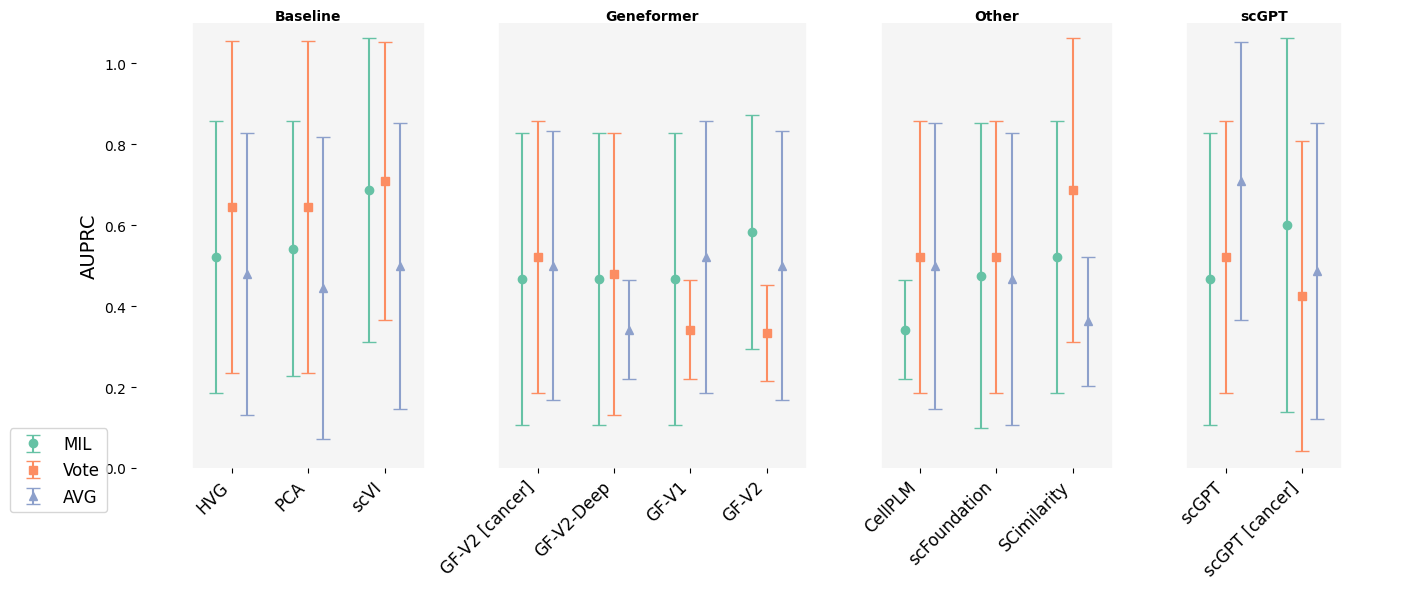

In [59]:
# ot_cv_metrics(dd, dd, labels, ['', ''], metric, show_error_bars=True, plot_type='errorbar')
fig = plot_cv_metrics(mil_df,vote_df, avg_df, ['MIL', 'Vote', 'AVG'],'',   True, plot_type = 'errorbar')
fig.savefig('./plots/luad1_auprc.png', dpi=100)
